In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [5]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Extracting L and N values (the first two lines of code) and leaving the pixel values and attributes
    L = int(lines[0].strip())  # number of example images
    N = int(lines[1].strip())  # number of pixels in each image
    
    # Initialize arrays to store pixel intensities and attributes
    pixel_intensities_array = np.zeros((L, N))
    attributes_array = np.zeros((L, len(lines[2].split()) - N))
    
    # Extracting examples
    for i, line in enumerate(lines[2:]):
        example_data = list(map(float, line.split()))
        pixel_intensities_array[i] = example_data[:N]
        attributes_array[i] = example_data[N:]
    
    return pixel_intensities_array, attributes_array

# Load data from each file
x24x24_pixel_intensities, x24x24_attributes = load_data('/Users/juliabarsow/Desktop/projekt_AI/famous48/x24x24.txt')
y24x24_pixel_intensities, y24x24_attributes = load_data('/Users/juliabarsow/Desktop/projekt_AI/famous48/y24x24.txt')
z24x24_pixel_intensities, z24x24_attributes = load_data('/Users/juliabarsow/Desktop/projekt_AI/famous48/z24x24.txt')

# Merging datasets
merged_pixel_intensities = np.concatenate((x24x24_pixel_intensities, y24x24_pixel_intensities, z24x24_pixel_intensities), axis=0)
merged_attributes = np.concatenate((x24x24_attributes, y24x24_attributes, z24x24_attributes), axis=0)


In [6]:
np.shape(merged_pixel_intensities) #we check if the shape of data is homogenous

(6835, 576)

In [7]:
np.shape(merged_attributes) # as we can see the shape of our data is beautiful and pretty <3

(6835, 8)

In [8]:
# Split the datasets into features (pixel intensities) and labels (attributes)
X = merged_pixel_intensities
y = merged_attributes

In [9]:
print(X.shape, y.shape) # we check if the correct shape is still preserved


(6835, 576) (6835, 8)


In [10]:
# Splitting data into training (70%) and the rest (30%) - testing and validation
#X_train, X_temp, y_train, y_temp = train_test_split(merged_pixel_intensities, merged_attributes, test_size=0.3, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [12]:
print(X_train.shape,X_test.shape,X_val.shape)  # when we sum up the number of rows in each set we get a total of 6835 - which is our total amount ofn images

(4784, 576) (1025, 576) (1026, 576)


In [13]:
print(y_train.shape,y_test.shape,y_val.shape) # our sets for attributes are also properly divided 

(4784, 8) (1025, 8) (1026, 8)


In [16]:
# function for plotting sample data
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    # Reshape the image data into a 2D array (assuming grayscale images)
    image = X[index].reshape((24, 24))  # Adjust dimensions based on your image size
    plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title(f"Attribute: {y[index]}")  # Display attribute label as title
    plt.axis('off')  # Hide axis
    plt.show()

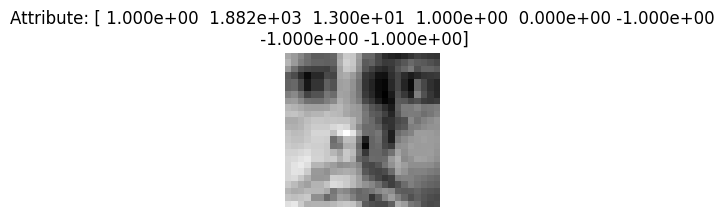

In [17]:
plot_sample(X_train, y_train, 0)

In [22]:
# now we will normalize pixel values to get better convergence during the training process
# for grayscale images, each pixel value represents the intensity of light, ranging from 0 (black) to 255 (white)
# by dividing each pixel value by 255, we effectively scale the intensity values to the range [0, 1]

X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [23]:
print(X_train.shape,X_test.shape,X_val.shape)

(4784, 576) (1025, 576) (1026, 576)


In [27]:
print(X_train[:20]) # we check if pixel intensities have been successfully normalized

[[1.09898962e-05 9.88862745e-06 8.34345252e-06 ... 4.14938870e-06
  3.48716647e-06 3.70791234e-06]
 [3.71283353e-06 4.72824298e-06 7.82036140e-06 ... 6.53837755e-06
  7.59832372e-06 5.07695502e-06]
 [3.80841215e-06 4.20795079e-06 4.08681276e-06 ... 1.05087120e-05
  3.85124183e-06 5.83713956e-07]
 ...
 [1.00434910e-05 3.62539023e-06 5.08692042e-06 ... 4.49279508e-06
  7.49722414e-06 8.35054210e-06]
 [2.37557862e-06 3.07572472e-06 4.26097655e-06 ... 1.31555402e-05
  1.39423914e-05 1.33088043e-05]
 [1.52388158e-05 1.17645213e-05 1.01580777e-05 ... 7.54100730e-06
  7.09879277e-06 6.47400231e-06]]


In [35]:
# now we need to reshape our data so that it can be fed to the neural network
X_train = X_train.reshape(-1,)
X_train[:5]

X_test = X_test.reshape(-1,)
X_test[:5]

X_val = X_val.reshape(-1,)
X_val[:5]

array([ 1.93568627e-06,  5.82191465e-07, -1.11141869e-07, -7.33471742e-07,
        5.17416378e-07])

In [ ]:
num_classes = 8

def make_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    conv1 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(input_layer)
    conv1 = layers.BatchNormalization()(conv1)
    conv1 = layers.LeakyReLU()(conv1)

    conv2 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(conv1)
    conv2 = layers.BatchNormalization()(conv2)
    conv2 = layers.LeakyReLU()(conv2)

    conv3 = layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same")(conv2)
    conv3 = layers.BatchNormalization()(conv3)
    conv3 = layers.LeakyReLU()(conv3)

    gap = layers.GlobalAveragePooling2D()(conv3)

    output_layer = layers.Dense(num_classes, activation="softmax")(gap)

    return models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Example input shape for grayscale images of size 24x24
input_shape = (24, 24, 1)

In [ ]:
from keras import layers
model = make_model(input_shape=input_shape)

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

In [ ]:
# Normalize the image data
#X_train = X_train.reshape((-1, 24, 24, 1)) / 255.0
#X_val = X_val.reshape((-1, 24, 24, 1)) / 255.0
#X_test = X_test.reshape((-1, 24, 24, 1)) / 255.0
# Normalize the image data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape,X_test.shape,X_val.shape)
# 4784 - nr of images, 24 -pixels x, 24 - pixels y, 1 - pictures are in grayscale

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)